In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
import os
os.chdir(r'G:\临时3-8\网易云课堂《菜菜的机器学习sklearn课堂》\课件\05逻辑回归与评分卡')


In [2]:
data = pd.read_csv('rankingcard.csv',index_col = 0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [4]:
data.shape

(150000, 11)

In [5]:
data.drop_duplicates(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [6]:
# 删除之后，恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [7]:
# 探索缺失值 (这个方式可以将我们的每一列的缺失值全部查找出来)
data.isnull().sum()/data.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [8]:
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()),inplace = True)
data.info()
data.isnull().sum()/data.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [9]:
# 使用随机森林来填充空值
def fill_missing_rf(x,y,to_fill):
    """
    使用随机森林填补一个特征的缺失值的函数：
    参数：
    x:要填补的特征矩阵
    y：完整的，没有缺失的标签
    to_fill：字符串，要填补的那一列的名称
    """
    df = x.copy()
    df_y = df.loc[:,to_fill]
    df_x = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],
                     axis =1)
    # 找出测试集和训练集
    y_train = df_y[df_y.notnull()]
    y_test = df_y[df_y.isnull()]
    x_train = df_x.iloc[y_train.index,:]
    x_test = df_x.iloc[y_test.index,:]
    
    # 利用随机森林的回归填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators = 100)
    rfr = rfr.fit(x_train,y_train)
    y_predict = rfr.predict(x_test)
    
    return y_predict

In [10]:
x = data.iloc[:,1:]
y = data["SeriousDlqin2yrs"]
x.shape

(149391, 10)

In [11]:
y_pred = fill_missing_rf(x,y,"MonthlyIncome")


In [12]:
# 利用新的数据进行覆盖
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] =y_pred
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           149391 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [13]:
# 描述性统计
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.030132,0.154235,0.556494,50708.0
age,149391.0,52.306237,14.725962,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.177441,0.368234,0.875279,329664.0
MonthlyIncome,149391.0,5423.975222,13222.965036,0.0,1800.000000,4420.000000,7416.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.000000,0.000000,0.000000,98.0


In [14]:
# 描述性统计
data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5423.975222,13222.965036,0.0,0.0,0.170000,1800.000000,4420.000000,7416.000000,10800.000000,23200.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [15]:
data = data[data['age'] != 0]
data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149390.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149390.0,6.071121,250.264509,0.0,0.0,0.003199,0.030132,0.154234,0.556491,0.978007,1.093923,50708.0
age,149390.0,52.306587,14.725390,21.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149390.0,0.393882,3.852966,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149390.0,354.439110,2041.850084,0.0,0.0,0.034991,0.177441,0.368233,0.875294,1275.000000,4985.110000,329664.0
MonthlyIncome,149390.0,5423.971366,13223.009209,0.0,0.0,0.170000,1800.000000,4420.000000,7416.000000,10800.000000,23200.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149390.0,8.480909,5.136528,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149390.0,0.238122,3.826177,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149390.0,1.022384,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149390.0,0.212504,3.810536,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [16]:
"""
另外，有三个指标看起来很奇怪：
"NumberOfTime30-59DaysPastDueNotWorse"
"NumberOfTime60-89DaysPastDueNotWorse"
"NumberOfTimes90DaysLate"
这三个指标分别是“过去两年内出现35-59天逾期但是没有发展的更坏的次数”，“过去两年内出现60-89天逾期但是没
有发展的更坏的次数”,“过去两年内出现90天逾期的次数”。这三个指标，在99%的分布的时候依然是2，最大值却是
98，看起来非常奇怪。一个人在过去两年内逾期35~59天98次，一年6个60天，两年内逾期98次这是怎么算出来的？
我们可以去咨询业务人员，请教他们这个逾期次数是如何计算的。如果这个指标是正常的，那这些两年内逾期了98次的
客户，应该都是坏客户。在我们无法询问他们情况下，我们查看一下有多少个样本存在这种异常：
"""
data[data.loc[:,"NumberOfTimes90DaysLate"]>90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [17]:
data.loc[:,"NumberOfTimes90DaysLate"].value_counts()

0     141107
1       5232
2       1555
3        667
4        291
98       220
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [18]:
data = data[data.loc[:,"NumberOfTimes90DaysLate"]<90]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149165 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149165 non-null int64
RevolvingUtilizationOfUnsecuredLines    149165 non-null float64
age                                     149165 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149165 non-null int64
DebtRatio                               149165 non-null float64
MonthlyIncome                           149165 non-null float64
NumberOfOpenCreditLinesAndLoans         149165 non-null int64
NumberOfTimes90DaysLate                 149165 non-null int64
NumberRealEstateLoansOrLines            149165 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149165 non-null int64
NumberOfDependents                      149165 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [19]:
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
SeriousDlqin2yrs                        149165 non-null int64
RevolvingUtilizationOfUnsecuredLines    149165 non-null float64
age                                     149165 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149165 non-null int64
DebtRatio                               149165 non-null float64
MonthlyIncome                           149165 non-null float64
NumberOfOpenCreditLinesAndLoans         149165 non-null int64
NumberOfTimes90DaysLate                 149165 non-null int64
NumberRealEstateLoansOrLines            149165 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149165 non-null int64
NumberOfDependents                      149165 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [20]:
# 样本不均衡的问题
# 探索数据标签
x = data.iloc[:,1:]
y = data.iloc[:,0]
y.value_counts()

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [21]:
n_sample = x.shape[0]
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]

print("样本个数：{}；\n1占{:.2%};\n0占{:.2%}".format(n_sample,n_1_sample/n_sample,
                                        n_0_sample/n_sample))

样本个数：149165；
1占6.62%;
0占93.38%


In [22]:
import imblearn
# imblearn 是专门用来处理不平衡数据集的库，在处理不平衡的问题中性能高过sklearn很多
# imblearn 里面也是一个个的类，也需要实例化，fit你和，和sklearn用法相似

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42) # 实例化
x,y = sm.fit_sample(x,y) # 已经上采样完毕的特征举证和标签
n_sample_ = x.shape[0]
x.shape

Using TensorFlow backend.


(278584, 10)

In [23]:
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]
print("样本个数：{}；\n1占{:.2%}\n0占{:.2%}".format(n_sample_,n_1_sample/n_sample_,
                                           n_0_sample/n_sample_))

样本个数：278584；
1占50.00%
0占50.00%


In [24]:
# 分测试集和训练集
from sklearn.model_selection import train_test_split
x_train,x_vail,y_train,y_vail = train_test_split(x,y,test_size = 0.3,random_state = 420)

In [25]:
# 在逻辑回过中我们需要将其合并
model_data = pd.concat([y_train,x_train],axis = 1)
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
81602,0,0.015404,53,0,0.121802,4728.0,5,0,0,0,0.000000
149043,0,0.168311,63,0,0.141964,1119.0,5,0,0,0,0.000000
215073,1,1.063570,39,1,0.417663,3500.0,5,1,0,2,3.716057
66278,0,0.088684,73,0,0.522822,5301.0,11,0,2,0,0.000000
157084,1,0.622999,53,0,0.423650,13000.0,9,0,2,0,0.181999


In [26]:
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.015404,53,0,0.121802,4728.0,5,0,0,0,0.000000
1,0,0.168311,63,0,0.141964,1119.0,5,0,0,0,0.000000
2,1,1.063570,39,1,0.417663,3500.0,5,1,0,2,3.716057
3,0,0.088684,73,0,0.522822,5301.0,11,0,2,0,0.000000
4,1,0.622999,53,0,0.423650,13000.0,9,0,2,0,0.181999


In [27]:
vali_data = pd.concat([y_vail,x_vail],axis =1)
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns
vali_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.000000,58,0,0.000481,2080.000000,4,0,0,0,0.000000
1,1,0.588870,44,0,0.198193,29373.217358,13,0,2,0,2.504880
2,0,0.057460,64,0,0.021830,6000.000000,4,0,0,0,0.000000
3,0,0.011585,52,0,0.139685,5583.000000,8,0,1,0,0.000000
4,1,0.663034,53,0,0.399663,4800.000000,12,0,0,0,0.201706


In [28]:
# model_data.to_csv('model_data.csv')
# vali_data.to_csv('vali_data.csv')

In [29]:
#分箱 等频分箱
model_data['qcut'],updown = pd.qcut(model_data["age"],retbins = True,q = 20)
"""
pd.qcut，基于分位数的分箱函数，本质是将连续型变量离散化
只能够处理一维数据。返回箱子的上限和下限
参数q：要分箱的个数
参数retbins=True来要求同时返回结构为索引为样本索引，元素为分到的箱子的Series
现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限
"""
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,0,0.015404,53,0,0.121802,4728.0,5,0,0,0,0.000000,"(52.0, 54.0]"
1,0,0.168311,63,0,0.141964,1119.0,5,0,0,0,0.000000,"(61.0, 64.0]"
2,1,1.063570,39,1,0.417663,3500.0,5,1,0,2,3.716057,"(36.0, 39.0]"
3,0,0.088684,73,0,0.522822,5301.0,11,0,2,0,0.000000,"(68.0, 74.0]"
4,1,0.622999,53,0,0.423650,13000.0,9,0,2,0,0.181999,"(52.0, 54.0]"


In [30]:
# 所有箱子的上限和下限
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

In [31]:
# 统计每个分组箱子重0和1的数量
count_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by='qcut').count()["SeriousDlqin2yrs"]
count_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby(by='qcut').count()["SeriousDlqin2yrs"]

# num_bins值分别为每一个区间的上界，下界，0出现的次数，1出现的次数
num_bins = [*zip(updown,updown[1:],count_y0,count_y1)]
# 注意zip会按照最短列来进行结合
num_bins

[(21.0, 28.0, 4243, 7529),
 (28.0, 31.0, 3571, 6003),
 (31.0, 34.0, 4075, 6744),
 (34.0, 36.0, 2908, 4571),
 (36.0, 39.0, 5182, 7495),
 (39.0, 41.0, 3956, 5813),
 (41.0, 43.0, 4002, 5694),
 (43.0, 45.0, 4389, 5973),
 (45.0, 46.0, 2419, 3299),
 (46.0, 48.0, 4813, 6169),
 (48.0, 50.0, 4900, 6181),
 (50.0, 52.0, 4728, 5830),
 (52.0, 54.0, 4681, 4985),
 (54.0, 56.0, 4677, 4040),
 (56.0, 58.0, 4483, 3379),
 (58.0, 61.0, 6583, 4797),
 (61.0, 64.0, 6968, 3200),
 (64.0, 68.0, 6623, 2298),
 (68.0, 74.0, 6753, 1928),
 (74.0, 107.0, 7737, 1389)]

In [32]:
# 定义 WOE和 IV函数
"""
BAD RATE与bad%不是一个东西
BAD RATE是一个箱中，坏的样本所占的比例(ad/total)
而bad%是一个箱体中的坏样本占整个特征中的坏样本的比例
"""
def get_woe(num_bins):
    # 通过num_bins数据计算woe
    columns = ['min','max','count_0','count_1']
    df =pd.DataFrame(num_bins,columns = columns)
    
    df['total'] = df.count_0 + df.count_1
    df['percentage'] = df.total / df.total.sum()
    df['bad_rate'] = df.count_1/df.total
    df["good%"] = df.count_0/df.count_0.sum()
    df['bad%'] = df.count_1/df.count_1.sum()
    df['woe'] = np.log(df["good%"] / df["bad%"])
    return df

# 计算IV值
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

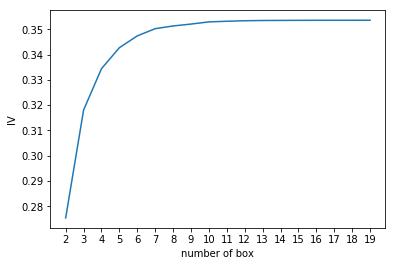

In [33]:
num_bins_ = num_bins.copy()
import matplotlib.pyplot as plt
import scipy

IV = []
axisx = []

while len(num_bins_) > 2:
    pvs = []
    # 获取num_bins_两两之间的卡方检验的置信度（或者卡方值）
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        # 0 返回chi2值，1返回P值
        pv = scipy.stats.chi2_contingency([x1,x2])[1]
        pvs.append(pv)
        
    # 通过P值进行处理，合并P值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(
        num_bins_[i][0],
        num_bins_[i+1][1],
        num_bins_[i][2] +num_bins_[i+1][2],
        num_bins_[i][3] + num_bins_[i+1][3]
    )]
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
    
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()

In [49]:
7435.61-7218.84

216.76999999999953

In [36]:
 # 用最佳分箱个数分箱，并验证分箱结果
def get_bin(num_bins_,n):
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        
        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [( 
            num_bins_[i][0],
            num_bins_[i+1][1],
            num_bins_[i][2] + num_bins_[i+1][2],
            num_bins_[i][3] + num_bins_[i+1][3]
                            )]
    return num_bins_

In [37]:
afterbins = get_bin(num_bins,6)
afterbins

[(21.0, 36.0, 14797, 24847),
 (36.0, 54.0, 39070, 51439),
 (54.0, 61.0, 15743, 12216),
 (61.0, 64.0, 6968, 3200),
 (64.0, 74.0, 13376, 4226),
 (74.0, 107.0, 7737, 1389)]

In [38]:
bins_df = get_woe(afterbins)
bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,36.0,14797,24847,39644,0.203294,0.626753,0.151467,0.255320,-0.522148
1,36.0,54.0,39070,51439,90509,0.464130,0.568330,0.399934,0.528572,-0.278877
2,54.0,61.0,15743,12216,27959,0.143374,0.436925,0.161151,0.125528,0.249814
3,61.0,64.0,6968,3200,10168,0.052141,0.314713,0.071327,0.032882,0.774342
4,64.0,74.0,13376,4226,17602,0.090263,0.240086,0.136922,0.043425,1.148370
5,74.0,107.0,7737,1389,9126,0.046798,0.152202,0.079199,0.014273,1.713594


In [47]:
# 将选取最佳分箱个数的过程包装为函数
def graphforbestbin(DF,x,y,n = 5,q =20,graph = True):
    """
    自动最优分箱函数，基于卡方检验的分箱
    参数：
    DF： 需要输入的数据
    x: 想要分箱的列名
    y：分箱数据对应的标签Y的列名
    n: 保留分箱个数
    q：出十分想的个数
    区间是左开右闭（]
    """
    DF = DF[[x,y]].copy()
    DF["qcut"],bins = pd.qcut(DF[x],retbins =True,q = q,duplicates = 'drop')
    count_y0 = DF.loc[DF[y] == 0].groupby(by = "qcut").count()[y]
    count_y1 = DF.loc[DF[y] == 1].groupby(by = 'qcut').count()[y]
    num_bins = [*zip(bins,bins[1:]),count_y0,count_y1]
    
#     for i in range(q):
#         if 0 in num_bins[0][2:]:
#             num_bins[0:2] = [(
#                 num_bins[0][0],
#                 num_bins[1][1],
#                 num_bins[0][2] + num_bins[1][2],
#                 num_bins[0][3] + num_bins[1][3]
#             )]
#             continue
# #         for i in range(len(num_bins)):    
#         for i in range(len(num_bins)):
# #             if 0 in num_bins[i][2:]:
#             if 0 in num_bins[i][2:]:
#                 num_bins[i-1:i+1] = [(
#                     num_bins[i-1][0],
#                     num_bins[i][1],
#                     num_bins[i-1][2] + num_bins[i][2],
#                     num_bins[i-1][3] + num_bins[i][3]
#                 )]

#                 break
#         else:
#             break
            
    def get_woe(num_bins):
        columns = ['min','max','count_0','count_1']
        df = pd.DataFrame(num_bins,columns = columns)
        df['total'] = df.count_0 + df.count_1
        df['percentage'] = df.total / df.total.sum()
        df['bad_rate'] = df.count_1/df.total
        df['good%'] = df.count_0/df_count_0.sum()
        df['bad%'] = df.count_1/df.count_1.sum()
        df['woe'] = np.log(df['good%'] / df['bad%'])
        return df
    
    def get_iv(df):
        rate = df['good%'] - df['bad%']
        iv = np.sum(rate * df.woe)
        return iv
    
    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
            
        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2] + num_bins[i+1][2],
            num_bins[i][3] + num_bins[i+1][3]
        )]
        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
    if graph:
        plt.figure()
        plt.plot(axis,IV)
        plt.xticks(axisx)
        plt,xlabel("number of box")
        plt.ylabel("IV")
        plt,show()
        
    return bins_df

In [48]:
# 对所有的特征进行分箱
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,'SeriousDlqin2yrs',n = 2,q =20)

RevolvingUtilizationOfUnsecuredLines


ValueError: No data; `observed` has size 0.